In [2]:
import pandas as pd
import numpy as np
import matplotlib
import plotly.express as px

In [3]:
%run ../../modules/utils.ipynb
%run ../../modules/cds.ipynb
%run ../../modules/preprocessing.ipynb

In [4]:
df3 = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/S2to5combined_20ul_40min.xlsx')
df6 = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/S6to10combined_20ul_40min.xlsx')
df3 = thermo_df(df3)
df6 = thermo_df(df6)
df3.shape, df6.shape

((4593, 3), (2727, 3))

In [5]:
df36 = pd.concat([df3, df6]).drop_duplicates()
df36.shape

(7320, 3)

<module 'matplotlib.pyplot' from '/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/matplotlib/pyplot.py'>

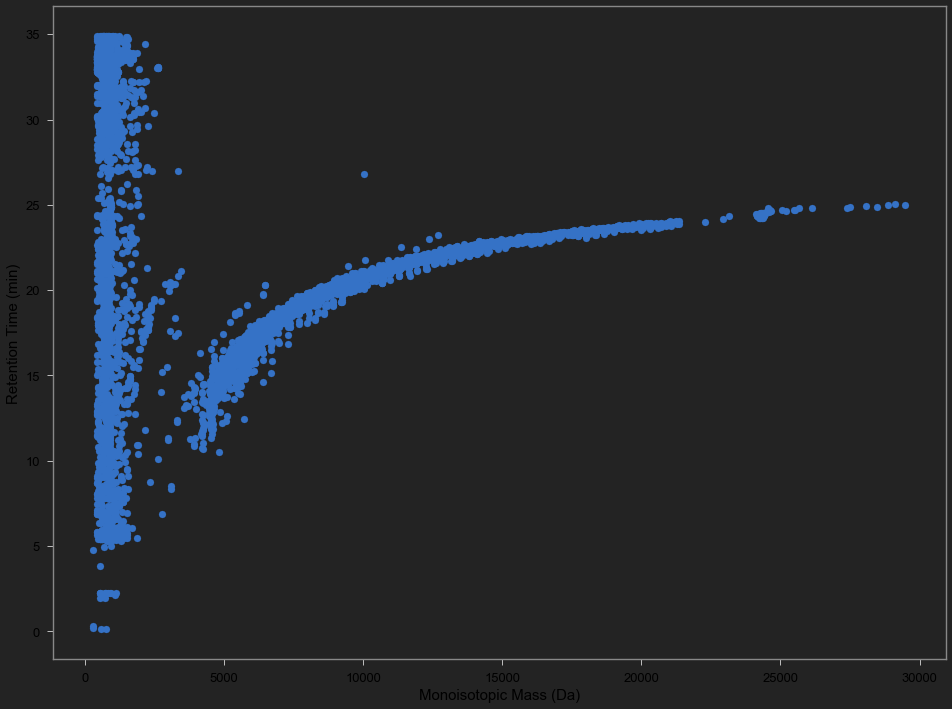

In [6]:
plot_zone(df36)

In [7]:
df_ngs_5p = pd.read_excel('/Users/bryan/Studio/tools/NGS_24189_5p.xlsx')
df_ngs_3p = pd.read_excel('/Users/bryan/Studio/tools/NGS_24189_3p.xlsx')
df_ngs_5p.shape, df_ngs_3p.shape

((75, 9), (75, 8))

In [8]:
masses = [24189.23, 24203.24, 24217.27, 24231.25]

In [9]:
ngs_5p_m1 = df_ngs_5p.Mass + M
ngs_5p_m1d2 = ngs_5p_m1 + 2 * 2
ngs_5p_m2d2 = ngs_5p_m1d2 + M
ngs_5p_m3d2 = ngs_5p_m2d2 + M
ngs_5p_m4d2 = ngs_5p_m3d2 + M

ngs_3p_m1 = df_ngs_3p.Mass + M
ngs_3p_m2 = ngs_3p_m1 + M
ngs_3p_m3 = ngs_3p_m2 + M
ngs_3p_m3d2 = ngs_3p_m3 + 2 * 2
ngs_3p_m4d2 = ngs_3p_m3d2 + M

In [10]:
# extra M at the end 
ngs_5p_m5d2 = ngs_5p_m4d2 + M

ngs_3p_m4 = ngs_3p_m3 + M

In [97]:
# extra M at the 2nd
ngs_5p_m2 = ngs_5p_m1 + M
ngs_5p_m3 = ngs_5p_m1 + M

ngs_5p_m6d2 = ngs_5p_m5d2 + M
ngs_5p_m7d2 = ngs_5p_m6d2 + M
ngs_5p_m6d1 = ngs_5p_m6d2 - 2
ngs_5p_m7d1 = ngs_5p_m7d2 - 2
ngs_5p_m6 = ngs_5p_m6d1 - 2
ngs_5p_m7 = ngs_5p_m7d1 - 2

ngs_3p_m5 = ngs_3p_m4 + M
ngs_3p_m6 = ngs_3p_m5 + M

In [43]:
def find_exist_ladder_dots(df, series):
    df_ladder = pd.DataFrame()
    df_ladder['Mass'] = series
    df_found = match_dfs(df_ladder, df)
    return df_found

In [107]:
# ngs_5p_list = [ngs_5p_m1, ngs_5p_m1d2, ngs_5p_m2d2, ngs_5p_m3d2, ngs_5p_m4d2, ngs_5p_m5d2, ngs_5p_m6d2, ngs_5p_m7d2]
ngs_5p_list = [ngs_5p_m1, ngs_5p_m1d2, ngs_5p_m2d2, ngs_5p_m3d2, ngs_5p_m4d2, ngs_5p_m5d2]
df_matched_5p_s3_list = list()
df_matched_5p_s6_list = list()
for ngs in ngs_5p_list:
    df_ngs = find_exist_ladder_dots(df3, ngs)
    df_matched_5p_s3_list.append(df_ngs)
    df_ngs = find_exist_ladder_dots(df6, ngs)
    df_matched_5p_s6_list.append(df_ngs)

ngs_3p_list = [ngs_3p_m1, ngs_3p_m2, ngs_3p_m3, ngs_3p_m3d2, ngs_3p_m4d2, ngs_3p_m4]
df_matched_3p_s3_list = list()
df_matched_3p_s6_list = list()
for ngs in ngs_3p_list:
    df_ngs = find_exist_ladder_dots(df3, ngs)
    df_matched_3p_s3_list.append(df_ngs)
    df_ngs = find_exist_ladder_dots(df6, ngs)
    df_matched_3p_s6_list.append(df_ngs)

In [ ]:
plotly_zone(df_matched_3p_s3)
# plotly_zones(df_matched_3p_s3, df_matched_5p_s3_list[4])

In [127]:

plotly_zones(df_matched_5p_s3, df_matched_5p_s3_list[-1])
# plotly_zone(df_matched_5p_s3_list[-1])

# plotly_zones(df_matched_3p_s6, df_matched_3p_s6_list[-3])

In [59]:

plotly_zones(df_matched_5p_s3, df_matched_5p_s3_list[-2])
plotly_zones(df_matched_5p_s6, df_matched_5p_s6_list[-2])

In [108]:
df_matched_5p_s3 = pd.concat(df_matched_5p_s3_list).drop_duplicates()
df_matched_5p_s6 = pd.concat(df_matched_5p_s6_list).drop_duplicates()
# plotly_zone(df_matched_5p_s3)
# plotly_zone(df_matched_5p_s6)
plotly_zones(df_matched_5p_s3, df_matched_5p_s6)

In [33]:
df_matched_3p_s3 = pd.concat(df_matched_3p_s3_list).drop_duplicates()
df_matched_3p_s6 = pd.concat(df_matched_3p_s6_list).drop_duplicates()
# plotly_zone(df_matched_5p_s3)
# plotly_zone(df_matched_5p_s6)
plotly_zones(df_matched_3p_s3, df_matched_3p_s6)

In [34]:
plotly_zones(df_matched_5p_s3, df_matched_3p_s3)

In [35]:
plotly_zones(df_matched_5p_s6, df_matched_3p_s6)

In [36]:
plotly_zone(df_matched_3p_s3)

In [37]:
plotly_zone(df_matched_3p_s6)

In [45]:
group = 'Group_24189'
full_mass = masses[0]
df_exam = df_matched_3p_s6
bcr = base_calling_random(df_exam, silence=True)
df_seats = process_mass_base_seats(df_exam, bcr[1], full_mass=full_mass, orientation=3)
df_seats.to_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/MassSum/FirstBatch/{}/seats_{}_3p.xlsx'.format(group, int(full_mass)))

In [47]:
df_matched_3p_s3.to_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/MassSum/FirstBatch/{}/{}_3p_s3.xlsx'.format(group, int(full_mass)))
df_matched_3p_s6.to_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/MassSum/FirstBatch/{}/{}_3p_s6.xlsx'.format(group, int(full_mass)))
df_matched_5p_s3.to_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/MassSum/FirstBatch/{}/{}_5p_s3.xlsx'.format(group, int(full_mass)))
df_matched_5p_s6.to_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/MassSum/FirstBatch/{}/{}_5p_s6.xlsx'.format(group, int(full_mass)))

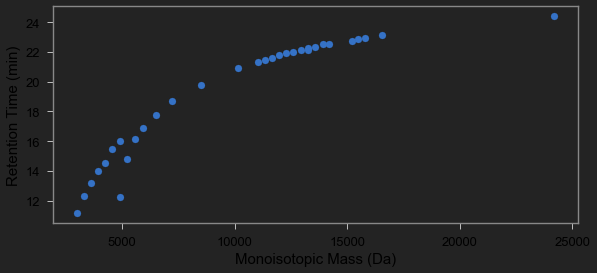

In [52]:
df_draw = df_matched_5p_s6
plt, fig = local_plot_zone(df_draw, y='RT')
output(df_draw, plt, fig, 2, '5p_s6')

In [50]:
def local_plot_zone(df, trend=False, order=1, y='RT'):
    fig = plt.figure(figsize=(8.5, 4))
    plt.xlabel('Monoisotopic Mass (Da)', fontname="Arial", fontsize=15, color='black')
    if y == 'RT':
        plt.ylabel('Retention Time (min)', fontname="Arial", fontsize=15, color='black')
    else:
        plt.ylabel('Intensity', fontname="Arial", fontsize=15, color='black')
    plt.xticks(fontname="Arial", size=13, color='black')
    plt.yticks(fontname="Arial", size=13, color='black')
    if trend:
        sns.regplot(df.Mass, df[y], order=order)
    else:
        plt.scatter(df.Mass, df[y])
    
    return plt, fig

def local_plot_zones(df3p, df5p, trend=False, y='RT'):
    fig = plt.figure(figsize=(8.5, 4))
    plt.xlabel('Monoisotopic Mass (Da)', fontname="Arial", fontsize=15, color='black')
    plt.ylabel('Retention Time (min)', fontname="Arial", fontsize=15, color='black')
    plt.xticks(fontname="Arial", size=13, color='black')
    plt.yticks(fontname="Arial", size=13, color='black')
    if trend:
        sns.regplot(df3p.Mass, df3p[y])
        sns.regplot(df5p.Mass, df5p[y], order=2)
    else:
        plt.scatter(df3p.Mass, df3p[y])
        plt.scatter(df5p.Mass, df5p[y])
    
    return plt, fig

In [49]:
def output(df_ds, plt, fig, idx, svg_name):
    fig.tight_layout()
    plt.savefig(f'/Users/bryan/Documents/BioPharmaFinder/BaoLab/MassSum/FirstBatch/Group_24189/Fig{idx}_{svg_name}.svg', dpi=300, transparent=True)
#     df_ds.to_excel(f'/Users/bryan/Documents/BioPharmaFinder/BaoLab/MassSum/FirstBatch/S{idx}_{svg_name}.xlsx')